<a href="https://colab.research.google.com/github/SridharaniKatipally/prediction-and-diagnosis-of-diabetes-using-ML/blob/main/Prediction_and_Diagnosis_of_diabetes_NEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CLASS
3    840
0    102
2     53
4      4
1      1
Name: count, dtype: int64
CLASS
3    840
0    102
2     53
Name: count, dtype: int64
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9821428571428571
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       174
           2       0.99      1.00      0.99       164
           3       0.99      0.97      0.98       166

    accuracy                           0.98       504
   macro avg       0.98      0.98      0.98       504
weighted avg       0.98      0.98      0.98       504



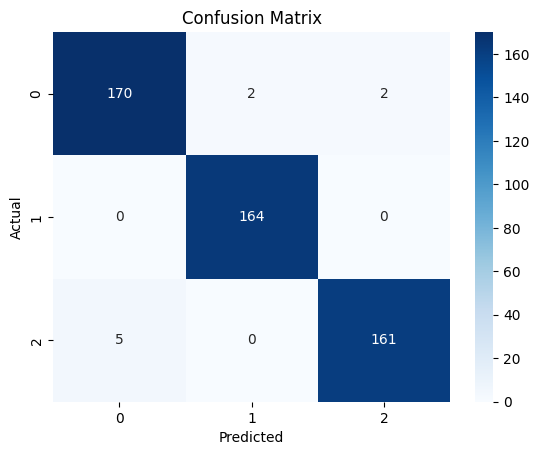

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Check the class distribution
class_counts = y.value_counts()
print(class_counts)

# Remove classes with fewer than 5 samples
min_samples_threshold = 5
data = data[y.map(y.value_counts()) >= min_samples_threshold]
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Check the class distribution again
class_counts = y.value_counts()
print(class_counts)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Normalize/Standardize continuous features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=8)  # Assuming we want to reduce to 8 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train_pca, y_train)

# Best parameters from Grid Search
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train Random Forest with the best parameters
rf_best = RandomForestClassifier(**best_params, random_state=42)
rf_best.fit(X_train_pca, y_train)

# Predictions
y_pred = rf_best.predict(X_test_pca)
y_pred_prob = rf_best.predict_proba(X_test_pca)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



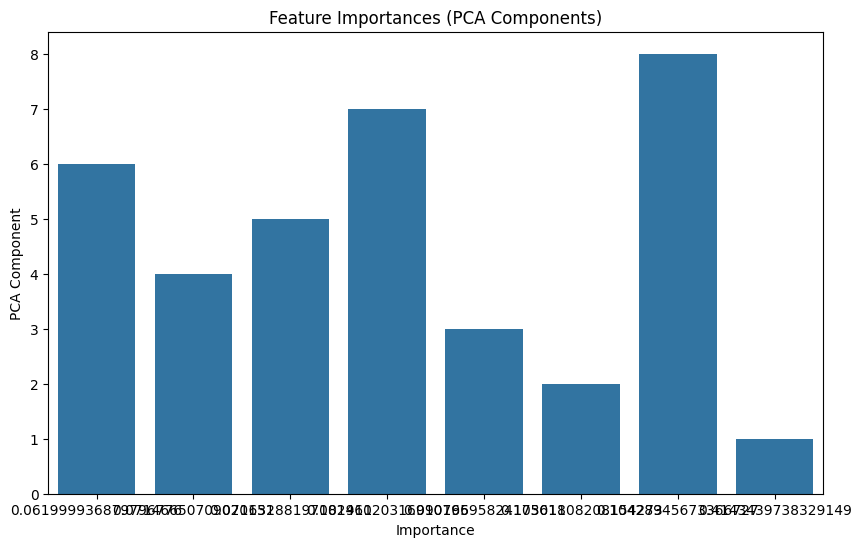

In [67]:
# Get feature importances from the trained Random Forest model
importances = rf_best.feature_importances_

# Number of PCA components
num_pca_components = pca.n_components_

# Create a DataFrame for feature importances (PCA components)
feature_importances = pd.DataFrame({
    'PCA Component': range(1, num_pca_components + 1),  # Naming components for clarity
    'Importance': importances
})

# Sort feature importances by importance value in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plotting the feature importances of PCA components
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='PCA Component', data=feature_importances)
plt.title('Feature Importances (PCA Components)')
plt.show()

CLASS
3    840
0    102
2     53
4      4
1      1
Name: count, dtype: int64
CLASS
3    840
0    102
2     53
Name: count, dtype: int64
Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters found for Random Forest:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Bagging Model Evaluation:
Accuracy: 0.9682539682539683
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       174
           2       0.96      0.98      0.97       164
           3       0.99      0.96      0.97       166

    accuracy                           0.97       504
   macro avg       0.97      0.97      0.97       504
weighted avg       0.97      0.97      0.97       504



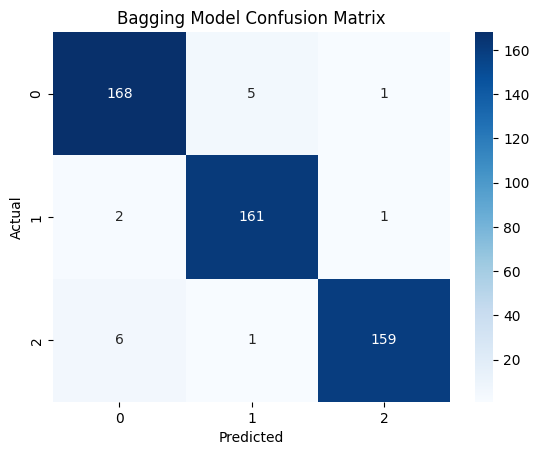

In [57]:
#Bagging Model
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Check the class distribution
class_counts = y.value_counts()
print(class_counts)

# Remove classes with fewer than 5 samples
min_samples_threshold = 5
data = data[y.map(y.value_counts()) >= min_samples_threshold]
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Check the class distribution again
class_counts = y.value_counts()
print(class_counts)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Normalize/Standardize continuous features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=8)  # Assuming we want to reduce to 8 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Hyperparameter tuning using GridSearchCV for the base estimator (Random Forest)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train_pca, y_train)

# Best parameters from Grid Search for the base estimator (Random Forest)
best_params = grid_search.best_params_
print("Best parameters found for Random Forest: ", best_params)

# Train Random Forest with the best parameters
rf_best = RandomForestClassifier(**best_params, random_state=42)
rf_best.fit(X_train_pca, y_train)

# Bagging Model with Random Forest as the base estimator
bagging_model = BaggingClassifier(base_estimator=rf_best, n_estimators=10, random_state=42)
bagging_model.fit(X_train_pca, y_train)

# Predictions
y_pred_bagging = bagging_model.predict(X_test_pca)
y_pred_prob_bagging = bagging_model.predict_proba(X_test_pca)[:, 1]

# Evaluation
print("\nBagging Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("Classification Report:\n", classification_report(y_test, y_pred_bagging))

# Confusion Matrix
conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)
sns.heatmap(conf_matrix_bagging, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Bagging Model Confusion Matrix')
plt.show()

CLASS
3    840
0    102
2     53
4      4
1      1
Name: count, dtype: int64
CLASS
3    840
0    102
2     53
Name: count, dtype: int64

Stacking Model Evaluation:
Accuracy: 0.9702380952380952
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       174
           2       0.98      0.98      0.98       164
           3       0.99      0.96      0.97       166

    accuracy                           0.97       504
   macro avg       0.97      0.97      0.97       504
weighted avg       0.97      0.97      0.97       504



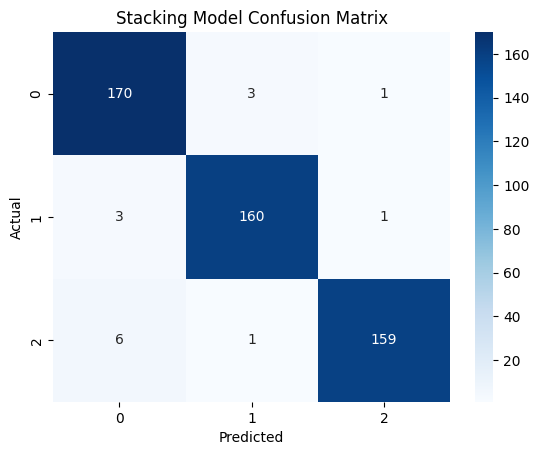

In [23]:
#Stacking Model
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Check the class distribution
class_counts = y.value_counts()
print(class_counts)

# Remove classes with fewer than 5 samples
min_samples_threshold = 5
data = data[y.map(y.value_counts()) >= min_samples_threshold]
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Check the class distribution again
class_counts = y.value_counts()
print(class_counts)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Normalize/Standardize continuous features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=8)  # Assuming we want to reduce to 8 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define base estimators
estimators = [
    ('rf1', RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)),
    ('rf2', RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42)),
    ('rf3', RandomForestClassifier(n_estimators=300, max_depth=30, min_samples_split=10, min_samples_leaf=4, random_state=42))
]

# Define stacking classifier with a logistic regression meta-classifier
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)

# Train stacking model
stacking_model.fit(X_train_pca, y_train)

# Predictions
y_pred_stack = stacking_model.predict(X_test_pca)
y_pred_prob_stack = stacking_model.predict_proba(X_test_pca)[:, 1]

# Evaluation
print("\nStacking Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Classification Report:\n", classification_report(y_test, y_pred_stack))

# Confusion Matrix
conf_matrix_stack = confusion_matrix(y_test, y_pred_stack)
sns.heatmap(conf_matrix_stack, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Stacking Model Confusion Matrix')
plt.show()

CLASS
3    840
0    102
2     53
4      4
1      1
Name: count, dtype: int64
CLASS
3    840
0    102
2     53
Name: count, dtype: int64
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy: 0.9742063492063492
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       174
           2       0.95      0.99      0.97       164
           3       0.99      0.94      0.97       166

    accuracy                           0.97       504
   macro avg       0.97      0.97      0.97       504
weighted avg       0.97      0.97      0.97       504



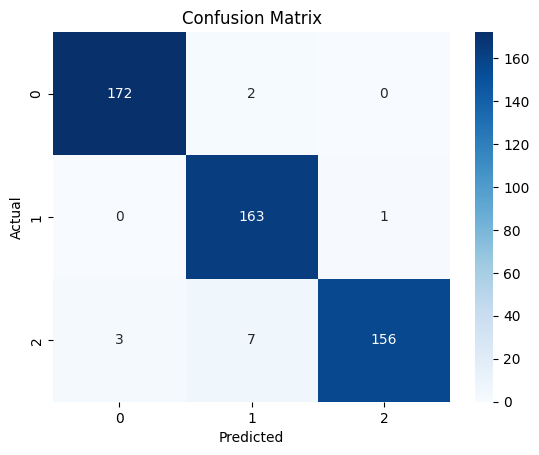

In [68]:
#KNN
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Check the class distribution
class_counts = y.value_counts()
print(class_counts)

# Remove classes with fewer than 5 samples
min_samples_threshold = 5
data = data[y.map(y.value_counts()) >= min_samples_threshold]
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Check the class distribution again
class_counts = y.value_counts()
print(class_counts)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Normalize/Standardize continuous features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply PCA if needed
pca = PCA(n_components=8)  # Assuming we want to reduce to 8 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train_pca, y_train)

# Best parameters from Grid Search
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train KNN with the best parameters
knn_best = KNeighborsClassifier(**best_params)
knn_best.fit(X_train_pca, y_train)

# Predictions
y_pred = knn_best.predict(X_test_pca)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [70]:
#LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']


In [71]:
# Check the class distribution
class_counts = y.value_counts()
print(class_counts)

# Remove classes with fewer than 5 samples
min_samples_threshold = 5
data = data[y.map(y.value_counts()) >= min_samples_threshold]
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


CLASS
3    840
0    102
2     53
4      4
1      1
Name: count, dtype: int64


In [72]:
# Normalize/Standardize continuous features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [73]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
lr = LogisticRegression(random_state=42)
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train Logistic Regression with the best parameters
lr_best = LogisticRegression(**best_params, random_state=42)
lr_best.fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='liblinear')

Accuracy: 0.9126984126984127
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       174
           2       0.89      0.87      0.88       164
           3       0.89      0.93      0.91       166

    accuracy                           0.91       504
   macro avg       0.91      0.91      0.91       504
weighted avg       0.91      0.91      0.91       504



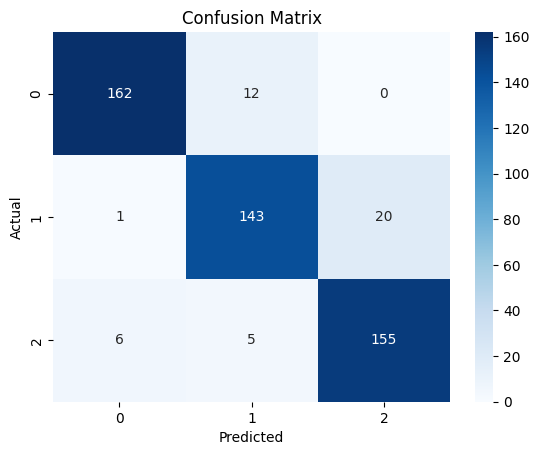

In [76]:
# Predictions
y_pred = lr_best.predict(X_test)
y_pred_prob = lr_best.predict_proba(X_test)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [77]:
#Naive Bayesian
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']


In [78]:
# Check the class distribution
class_counts = y.value_counts()
print(class_counts)

# Remove classes with fewer than 5 samples
min_samples_threshold = 5
data = data[y.map(y.value_counts()) >= min_samples_threshold]
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


CLASS
3    840
0    102
2     53
4      4
1      1
Name: count, dtype: int64


In [79]:
# Normalize/Standardize continuous features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Accuracy: 0.9523809523809523
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       174
           2       0.96      0.99      0.98       164
           3       0.94      0.93      0.94       166

    accuracy                           0.95       504
   macro avg       0.95      0.95      0.95       504
weighted avg       0.95      0.95      0.95       504



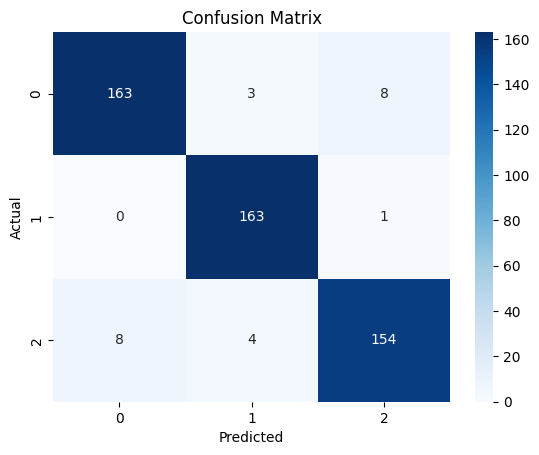

In [81]:
# Train Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions
y_pred = nb.predict(X_test)
y_pred_prob = nb.predict_proba(X_test)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [82]:
#Decision Trees
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']


In [83]:
# Check the class distribution
class_counts = y.value_counts()
print(class_counts)

# Remove classes with fewer than 5 samples
min_samples_threshold = 5
data = data[y.map(y.value_counts()) >= min_samples_threshold]
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


CLASS
3    840
0    102
2     53
4      4
1      1
Name: count, dtype: int64


In [84]:
# Normalize/Standardize continuous features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Accuracy: 0.9940476190476191
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       174
           2       1.00      1.00      1.00       164
           3       0.99      0.99      0.99       166

    accuracy                           0.99       504
   macro avg       0.99      0.99      0.99       504
weighted avg       0.99      0.99      0.99       504



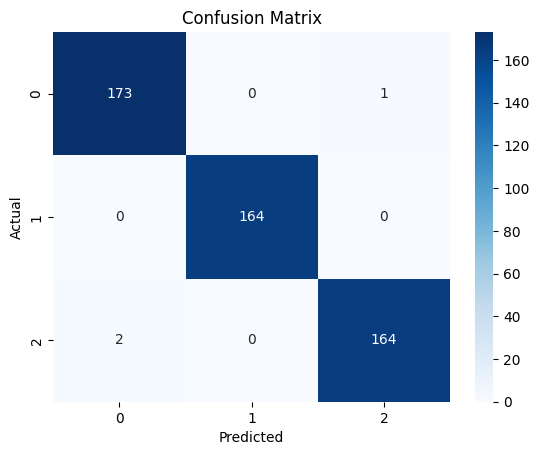

In [86]:
# Train Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)
y_pred_prob = dt.predict_proba(X_test)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

CLASS
3    840
0    102
2     53
4      4
1      1
Name: count, dtype: int64
CLASS
3    840
0    102
2     53
Name: count, dtype: int64
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found:  {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
Accuracy: 0.9920634920634921
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       174
           1       1.00      1.00      1.00       164
           2       1.00      0.98      0.99       166

    accuracy                           0.99       504
   macro avg       0.99      0.99      0.99       504
weighted avg       0.99      0.99      0.99       504



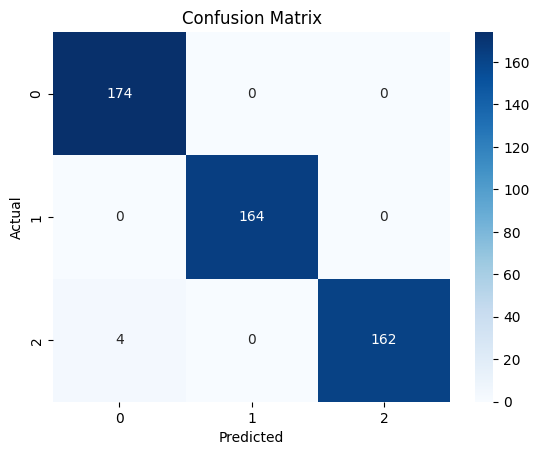

In [110]:
#XGBoost
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Check the class distribution
class_counts = y.value_counts()
print(class_counts)

# Remove classes with fewer than 5 samples
min_samples_threshold = 5
data = data[y.map(y.value_counts()) >= min_samples_threshold]
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Check the class distribution again
class_counts = y.value_counts()
print(class_counts)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Ensure classes are consecutive integers starting from 0
label_encoder_y = LabelEncoder()
y_resampled = label_encoder_y.fit_transform(y_resampled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the XGBoost model
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.15]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train XGBoost with the best parameters
model_best = xgb.XGBClassifier(**best_params, objective='binary:logistic', random_state=42)
model_best.fit(X_train, y_train)

# Predictions
y_pred = model_best.predict(X_test)
y_pred_prob = model_best.predict_proba(X_test)[:, 1]

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters found:  {'learning_rate': 0.1, 'n_estimators': 50}
Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88        21
           2       1.00      0.83      0.91         6
           3       0.99      0.97      0.98       172
           4       0.00      0.00      0.00         1

    accuracy                           0.96       200
   macro avg       0.69      0.70      0.69       200
weighted avg       0.96      0.96      0.96       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


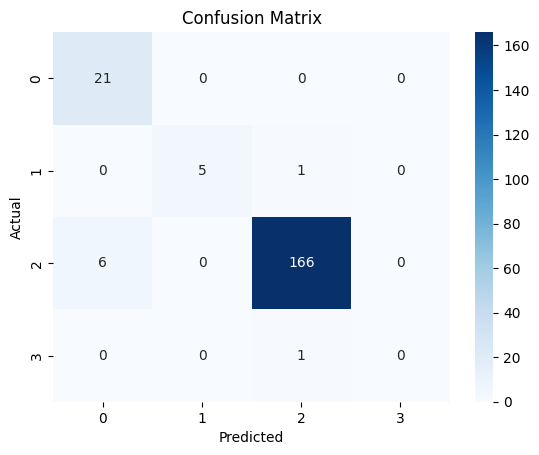

In [112]:
#ADABoost
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables if needed
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Drop unnecessary columns
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
base_estimator = DecisionTreeClassifier(max_depth=1)
model = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)
best_model = AdaBoostClassifier(base_estimator=base_estimator, **best_params, random_state=42)
best_model.fit(X_train, y_train)
# Predictions
y_pred = best_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found:  {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200}
Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           2       0.86      1.00      0.92         6
           3       0.98      0.99      0.98       172
           4       0.00      0.00      0.00         1

    accuracy                           0.97       200
   macro avg       0.70      0.71      0.70       200
weighted avg       0.97      0.97      0.97       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


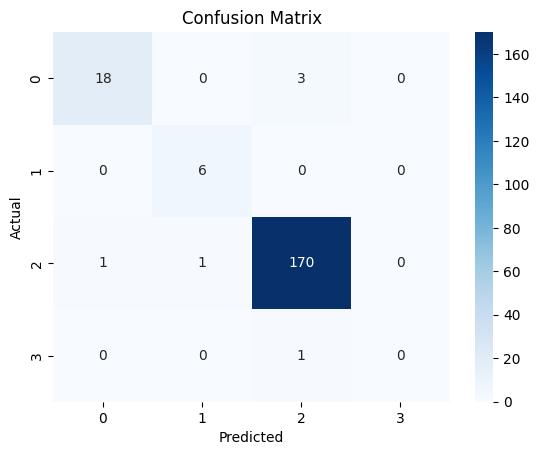

In [113]:
#gradient boosting machine(GBM)
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables if needed
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Drop unnecessary columns
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GradientBoostingClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)
best_model = GradientBoostingClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)
# Predictions
y_pred = best_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 560
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 11
[LightGBM] [Info] Start training from score -2.290163
[LightGBM] [Info] Start training from score -6.684612
[LightGBM] [Info] Start training from score -2.834464
[LightGBM] [Info] Start training from score -0.180324
[LightGBM] [Info] Start training from score -5.585999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


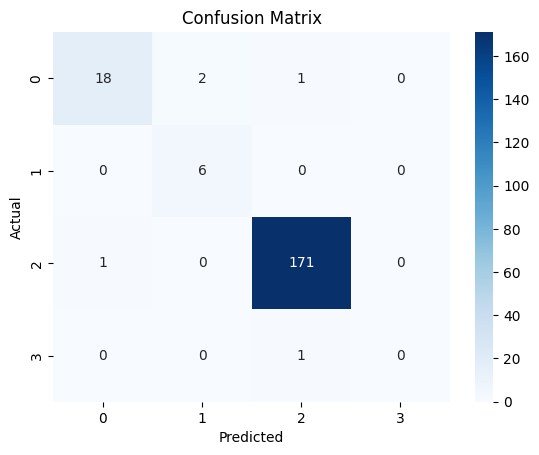

In [122]:
#LightGBM
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables if needed
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Drop unnecessary columns
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LGBMClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'num_leaves': [31, 63, 127]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)
best_model = LGBMClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)
# Predictions
y_pred = best_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Fitting 5 folds for each of 80 candidates, totalling 400 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found:  {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        21
           2       0.83      0.83      0.83         6
           3       0.97      0.98      0.97       172
           4       0.00      0.00      0.00         1

    accuracy                           0.95       200
   macro avg       0.67      0.67      0.67       200
weighted avg       0.95      0.95      0.95       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


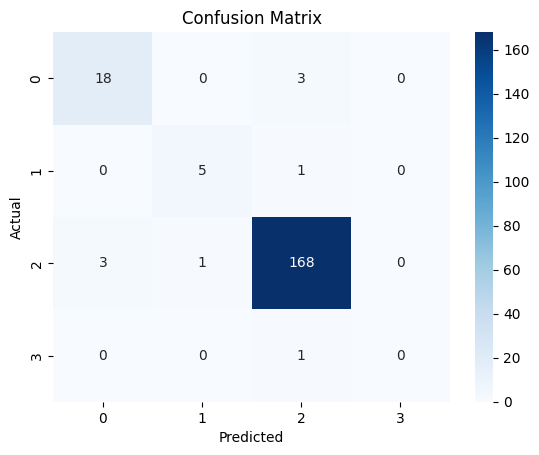

In [123]:
#SVM
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables if needed
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Drop unnecessary columns
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize/Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = SVC(random_state=42)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 1, 0.1, 0.01],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)
best_model = SVC(**best_params, random_state=42)
best_model.fit(X_train, y_train)
# Predictions
y_pred = best_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [144]:
#Autoencoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables if needed
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize/Normalize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from keras.models import Model
from keras.layers import Input, Dense

# Define the Autoencoder architecture
input_dim = X_train_scaled.shape[1]
encoding_dim = 32  # Adjust based on your data and compression needs

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the Autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the Autoencoder
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test_scaled, X_test_scaled))
# Extracting features using the encoder part of the Autoencoder
encoder = Model(inputs=input_layer, outputs=encoded)
X_train_encoded = encoder.predict(X_train_scaled)
X_test_encoded = encoder.predict(X_test_scaled)
# Train Random Forest classifier on encoded features
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_encoded, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test_encoded)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Epoch 1/50
25/25 [==============================] - 1s 8ms/step - loss: 1.2527 - val_loss: 1.3988
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 1.1775 - val_loss: 1.3271
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 1.1080 - val_loss: 1.2587
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 1.0426 - val_loss: 1.1975
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.9852 - val_loss: 1.1426
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.9361 - val_loss: 1.0979
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.8964 - val_loss: 1.0616
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 0.8638 - val_loss: 1.0315
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 0.8372 - val_loss: 1.0061
Epoch 10/50
25/25 [==============================] - 0s 3ms/step - loss: 0.8146 - val_loss: 0.9840
Epoch 11/50
25/25 [

CLASS
3    840
0    102
2     53
4      4
1      1
Name: count, dtype: int64
CLASS
3    840
0    102
2     53
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network (MLPClassifier) Model:
Accuracy: 0.9547738693467337
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85        21
           2       0.60      0.86      0.71         7
           3       0.98      0.98      0.98       171

    accuracy                           0.95       199
   macro avg       0.83      0.88      0.85       199
weighted avg       0.96      0.95      0.96       199



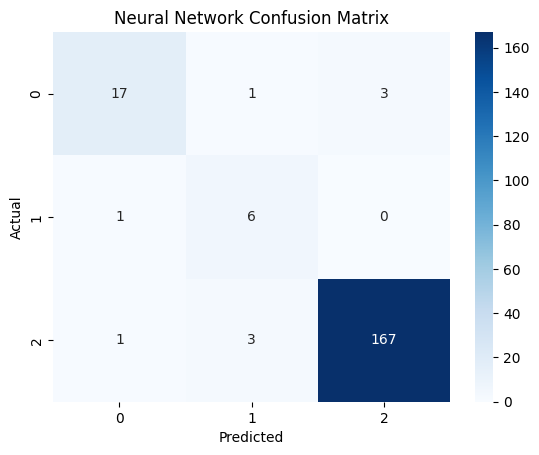

In [146]:
#Neural Network (Multilayer Perceptron) model
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Check the class distribution
class_counts = y.value_counts()
print(class_counts)

# Remove classes with fewer than 5 samples
min_samples_threshold = 5
data = data[y.map(y.value_counts()) >= min_samples_threshold]
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Check the class distribution again
class_counts = y.value_counts()
print(class_counts)

# Handle class imbalance with SMOTE and RandomUnderSampler
smote = SMOTE(random_state=42)
under_sampler = RandomUnderSampler(random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE and RandomUnderSampler to training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train_resampled, y_train_resampled)

# Normalize/Standardize continuous features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the MLPClassifier (Neural Network)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train_scaled, y_train_resampled)

# Predictions
y_pred_mlp = mlp.predict(X_test_scaled)
y_pred_prob_mlp = mlp.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Neural Network (MLPClassifier) Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))

# Confusion Matrix
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Neural Network Confusion Matrix')
plt.show()



Linear Regression Model:
Mean Squared Error (MSE): 0.45
R-squared (R2): 0.48


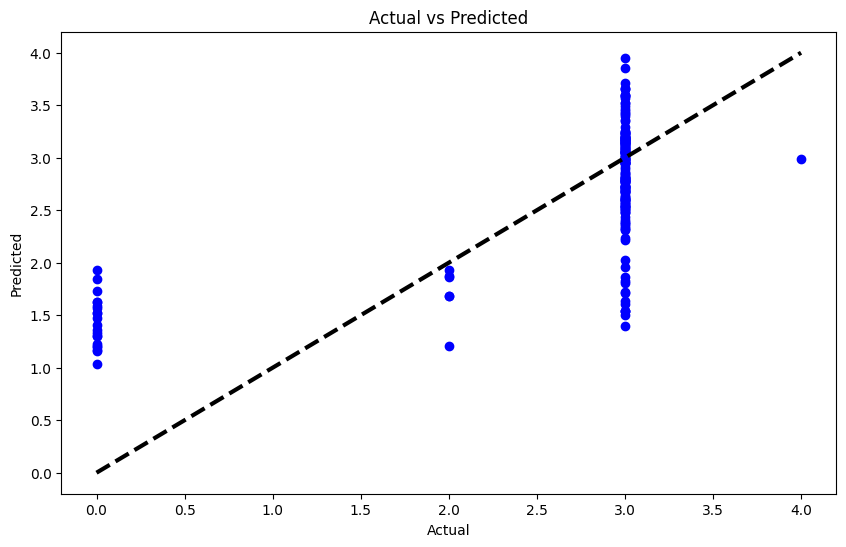

In [148]:
#Linear Regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables if necessary
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)  # Assuming CLASS is the target variable
y = label_encoder.fit_transform(data['CLASS'])  # Encode CLASS if categorical

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize/Standardize continuous features if necessary
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Linear Regression Model:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualize predictions vs actuals if applicable
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


Polynomial Regression Model:
Mean Squared Error (MSE): 0.35
R-squared (R2): 0.60


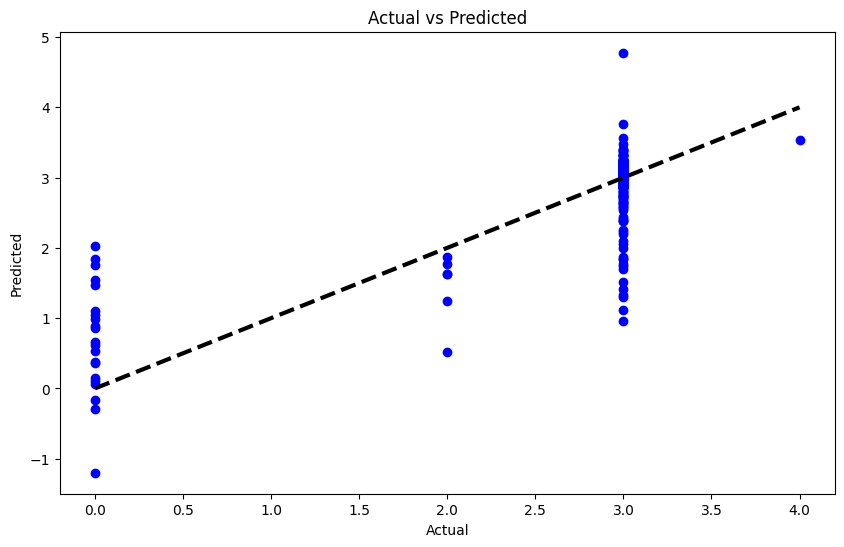

In [149]:
#Polynomial Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables if necessary
# Assuming 'Gender' and 'CLASS' are categorical variables
data['Gender'] = data['Gender'].astype('category').cat.codes
data['CLASS'] = data['CLASS'].astype('category').cat.codes

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial transformation of features
degree = 2  # Degree of the polynomial features
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Standardize/Normalize the polynomial features if necessary
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

# Initialize and train the Polynomial Regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predictions
y_pred = model.predict(X_test_poly)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Polynomial Regression Model:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualize predictions vs actuals if applicable
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


Lasso Regression Model:
Mean Squared Error (MSE): 0.50
R-squared (R2): 0.43


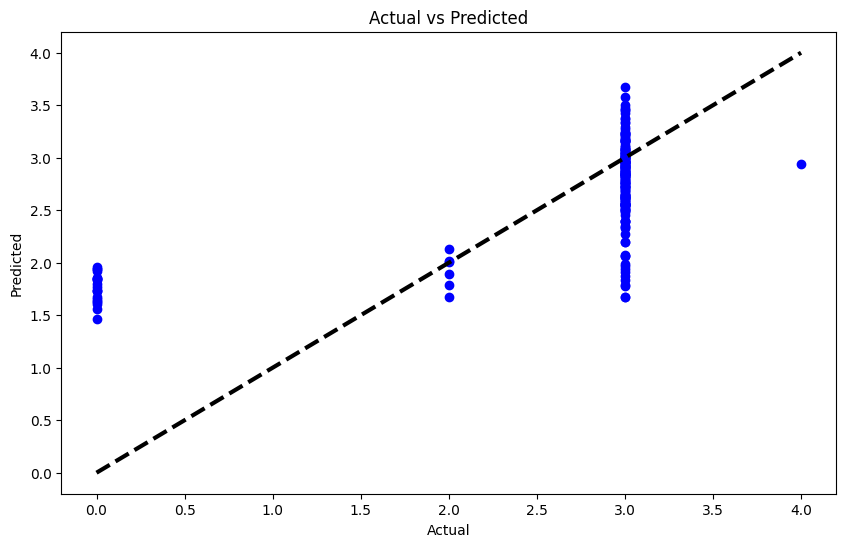

In [150]:
#Lasso Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables if necessary
# Assuming 'Gender' and 'CLASS' are categorical variables
data['Gender'] = data['Gender'].astype('category').cat.codes
data['CLASS'] = data['CLASS'].astype('category').cat.codes

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize/Normalize the features if necessary
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Lasso Regression model
alpha = 0.1  # Regularization parameter
lasso = Lasso(alpha=alpha, random_state=42)
lasso.fit(X_train, y_train)

# Predictions
y_pred = lasso.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Lasso Regression Model:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualize predictions vs actuals if applicable
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


Ridge Regression Model:
Mean Squared Error (MSE): 0.45
R-squared (R2): 0.48


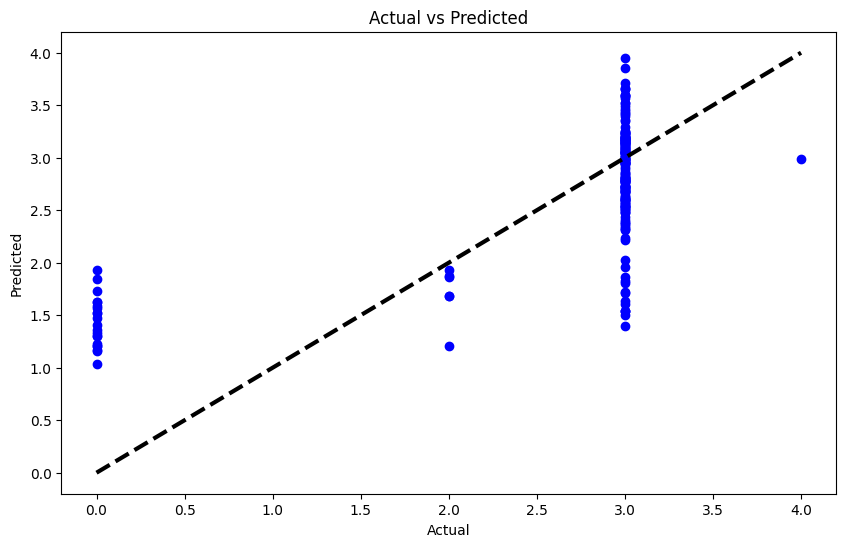

In [151]:
#Ridge Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables if necessary
# Assuming 'Gender' and 'CLASS' are categorical variables
data['Gender'] = data['Gender'].astype('category').cat.codes
data['CLASS'] = data['CLASS'].astype('category').cat.codes

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize/Normalize the features if necessary
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Ridge Regression model
alpha = 0.1  # Regularization parameter
ridge = Ridge(alpha=alpha, random_state=42)
ridge.fit(X_train, y_train)

# Predictions
y_pred = ridge.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Ridge Regression Model:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualize predictions vs actuals if applicable
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


ElasticNet Regression Model:
Mean Squared Error (MSE): 0.47
R-squared (R2): 0.46


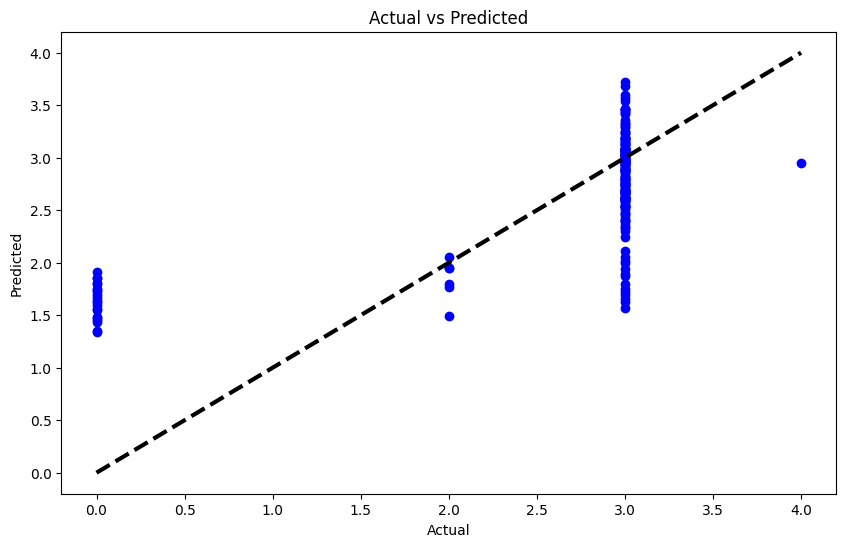

In [152]:
#ElasticNet Regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables if necessary
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize/Normalize the features if necessary
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the ElasticNet Regression model
alpha = 0.1  # Regularization parameter
l1_ratio = 0.5  # Mixing parameter for L1 and L2 penalties
enet = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
enet.fit(X_train, y_train)

# Predictions
y_pred = enet.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("ElasticNet Regression Model:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualize predictions vs actuals if applicable
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


In [155]:
!pip install minisom


  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=24108b74f031630353fb3237643d78a05c30db5e50e2830773b52712c5515a26
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


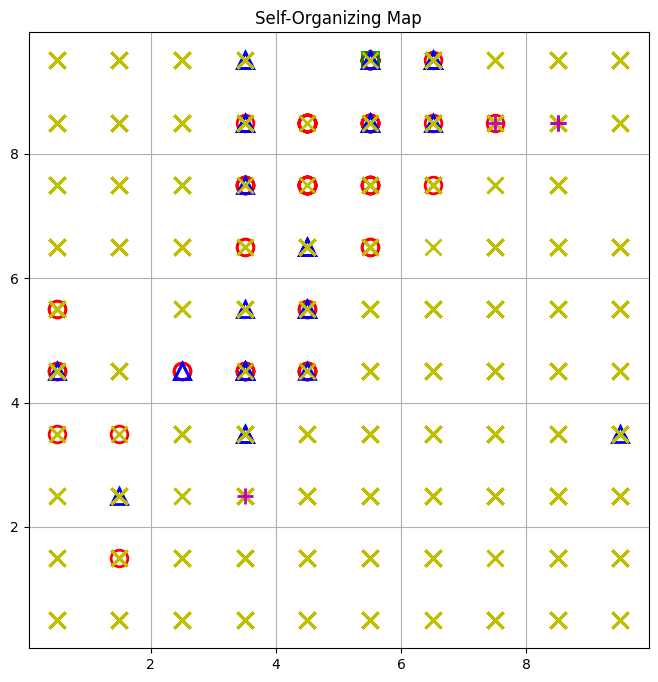

In [156]:
#Self-Organizing Map (SOM)
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from minisom import MiniSom
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables if necessary
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Initialize the SOM
som = MiniSom(x=10, y=10, input_len=X_normalized.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_normalized)

# Train the SOM
num_iterations = 1000
som.train_random(data=X_normalized, num_iteration=num_iterations)

# Visualization
plt.figure(figsize=(8, 8))
plt.title('Self-Organizing Map')
markers = ['o', 's', '^', 'x', '+']
colors = ['r', 'g', 'b', 'y', 'm']
for i, x in enumerate(X_normalized):
    winner = som.winner(x)
    plt.plot(winner[0] + 0.5, winner[1] + 0.5, markers[y[i]], markerfacecolor='None', markeredgecolor=colors[y[i]], markersize=12, markeredgewidth=2)

plt.grid(True)
plt.show()


Gaussian Naive Bayes Model:
Accuracy: 0.865
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.95      0.80        21
           2       1.00      1.00      1.00         6
           3       0.99      0.85      0.92       172
           4       0.00      0.00      0.00         1

    accuracy                           0.86       200
   macro avg       0.67      0.70      0.68       200
weighted avg       0.95      0.86      0.90       200



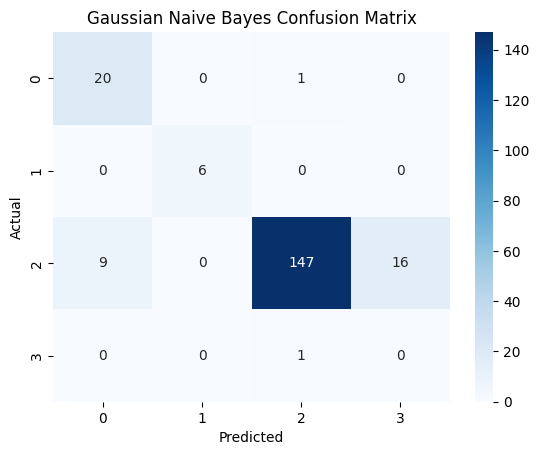

In [1]:
#Gaussian Naive Bayes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Gaussian Naive Bayes model
gnb = GaussianNB()

# Fit the model
gnb.fit(X_train, y_train)

# Predictions
y_pred = gnb.predict(X_test)

# Evaluation
print("Gaussian Naive Bayes Model:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.show()



Gaussian Naive Bayes Model:
Accuracy: 0.7956349206349206
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       174
           2       0.73      0.73      0.73       164
           3       0.91      0.86      0.88       166

    accuracy                           0.80       504
   macro avg       0.80      0.80      0.80       504
weighted avg       0.80      0.80      0.80       504



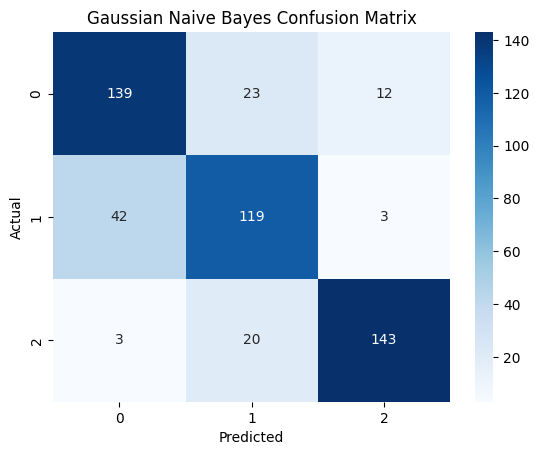

In [3]:
#Gaussian Naive Bayes-smote,PCA
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Remove classes with fewer than 5 samples
min_samples_threshold = 5
data = data[y.map(y.value_counts()) >= min_samples_threshold]
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Normalize/Standardize continuous features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize and train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)

# Predictions
y_pred = gnb.predict(X_test_pca)
y_pred_prob = gnb.predict_proba(X_test_pca)[:, 1]

# Evaluation
print("Gaussian Naive Bayes Model:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.show()

Best parameters found: {'alpha': 5.0}
Accuracy: 0.8134920634920635
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       174
           2       0.72      0.71      0.72       164
           3       0.99      0.92      0.95       166

    accuracy                           0.81       504
   macro avg       0.82      0.81      0.82       504
weighted avg       0.82      0.81      0.82       504



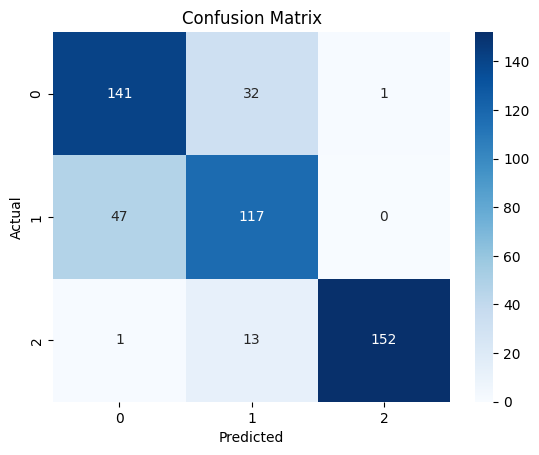

In [6]:
#Multinomial Naive Bayes
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Remove classes with fewer than 5 samples
min_samples_threshold = 5
data = data[y.map(y.value_counts()) >= min_samples_threshold]
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Normalize/Standardize continuous features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=8)  # Adjust components based on variance explained
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Ensure no negative values for MultinomialNB
X_train_pca -= X_train_pca.min()
X_test_pca -= X_test_pca.min()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]
}
mnb = MultinomialNB()
grid_search = GridSearchCV(estimator=mnb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_pca, y_train)

# Best parameters from Grid Search
best_params = grid_search.best_params_
print("Best parameters found:", best_params)

# Train Multinomial Naive Bayes with the best parameters
mnb_best = MultinomialNB(**best_params)
mnb_best.fit(X_train_pca, y_train)

# Predictions
y_pred = mnb_best.predict(X_test_pca)
y_pred_prob = mnb_best.predict_proba(X_test_pca)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

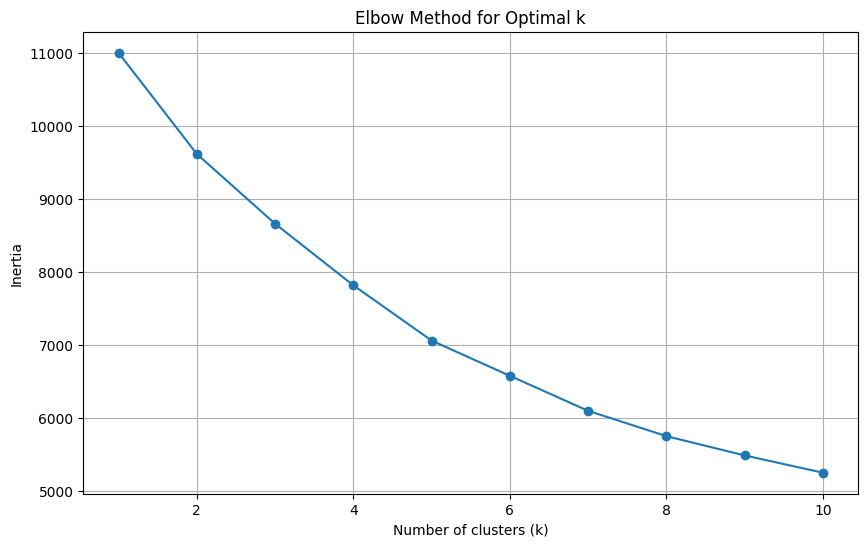

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


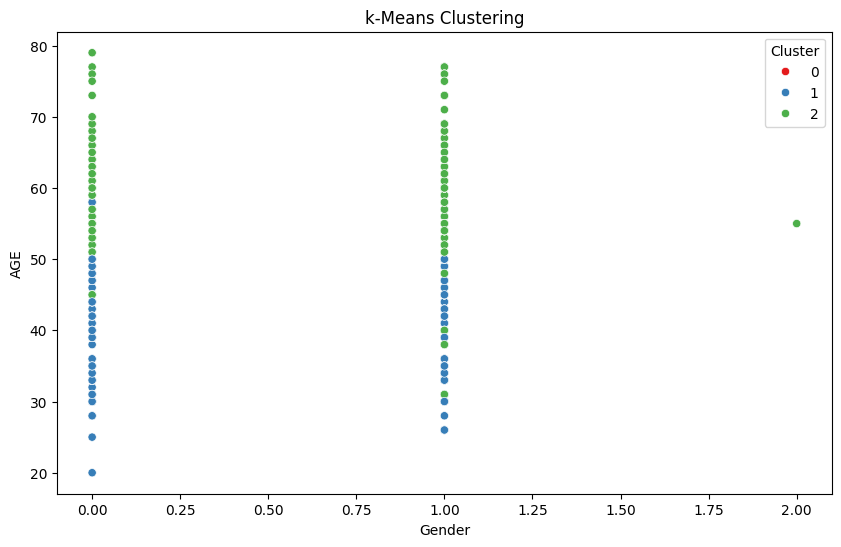

Cluster Centers:
     Gender       AGE      Urea        Cr     HbA1c      Chol        TG  \
0  0.296049  0.102398  5.825257  5.887533 -0.130752  0.045046  0.438905   
1 -0.180928 -1.233222 -0.216092 -0.113641 -1.084869 -0.093948 -0.301621   
2  0.052339  0.392646 -0.040037 -0.073983  0.349551  0.029214  0.088277   

        HDL       LDL      VLDL       BMI  
0 -0.191156  0.004034 -0.155386  0.252132  
1  0.019744  0.100648 -0.135373 -1.202536  
2 -0.002734 -0.032278  0.046224  0.380022  


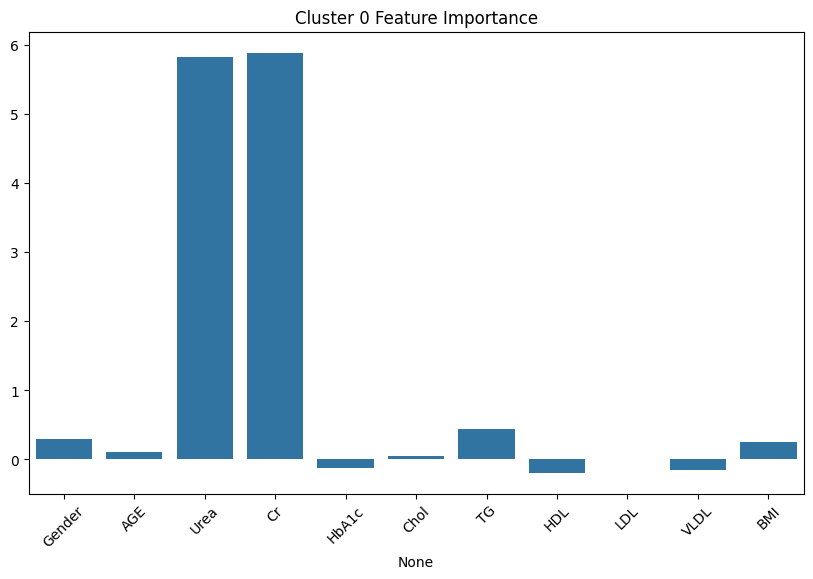

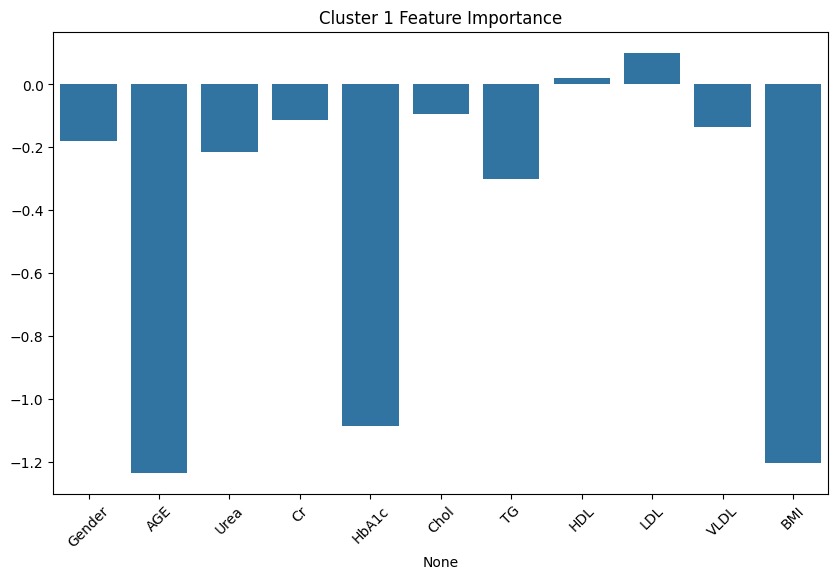

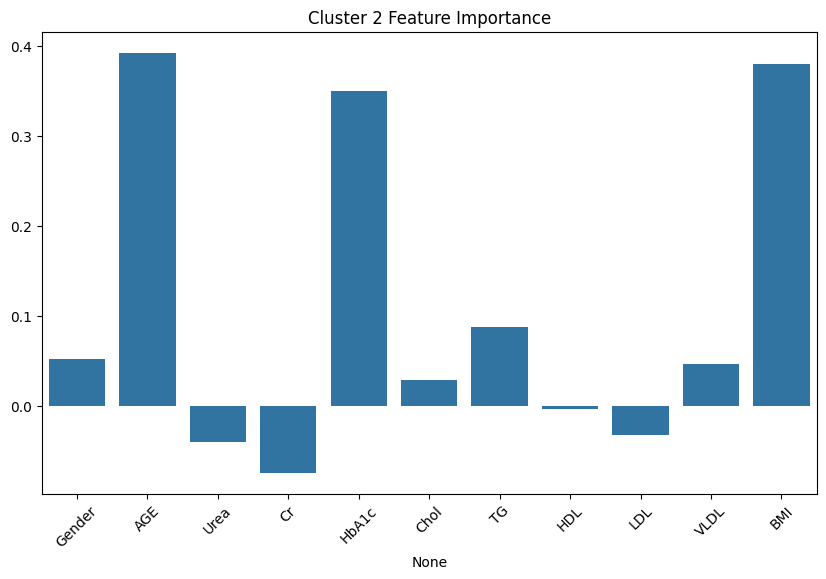

In [3]:
#K-means clustering
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Define features (excluding target variable and other non-relevant columns)
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Based on the Elbow Method, choose the optimal k and fit the k-Means model
k = 3  # Example: choosing k=3 based on the Elbow Method
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

# Visualize clusters (assuming two important features for visualization)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.columns[0], y=X.columns[1], hue='Cluster', data=data, palette='Set1', legend='full')
plt.title('k-Means Clustering')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.show()

# Optional: Analyze cluster centroids (for interpretation)
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print("Cluster Centers:")
print(cluster_centers)

# Plot feature importances
for i in range(k):
    cluster = cluster_centers.iloc[i]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cluster.index, y=cluster.values)
    plt.title(f'Cluster {i} Feature Importance')
    plt.xticks(rotation=45)
    plt.show()


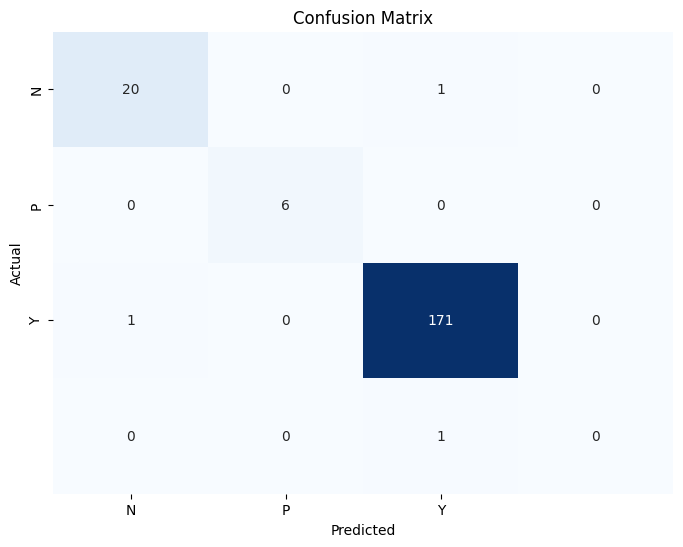

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           2       1.00      1.00      1.00         6
           3       0.99      0.99      0.99       172
           4       0.00      0.00      0.00         1

    accuracy                           0.98       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.98      0.98      0.98       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
#Hierarchical Clustering model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Drop rows with NaN values
data.dropna(inplace=True)

# Encode categorical variables if needed
# Assuming 'Gender' and 'CLASS' are categorical and need encoding
data['Gender'] = data['Gender'].astype('category').cat.codes
data['CLASS'] = data['CLASS'].astype('category').cat.codes

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize/Standardize continuous features if necessary
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest classifier (example)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['N', 'P', 'Y'], yticklabels=['N', 'P', 'Y'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Additional Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Epoch 1/50
4/4 [==============================] - 3s 114ms/step - loss: 0.7667 - accuracy: 0.4919 - val_loss: 0.6814 - val_accuracy: 0.6774
Epoch 2/50
4/4 [==============================] - 0s 27ms/step - loss: 0.7455 - accuracy: 0.5323 - val_loss: 0.6530 - val_accuracy: 0.6452
Epoch 3/50
4/4 [==============================] - 0s 26ms/step - loss: 0.6392 - accuracy: 0.6694 - val_loss: 0.6264 - val_accuracy: 0.7097
Epoch 4/50
4/4 [==============================] - 0s 32ms/step - loss: 0.6621 - accuracy: 0.6532 - val_loss: 0.6020 - val_accuracy: 0.7742
Epoch 5/50
4/4 [==============================] - 0s 26ms/step - loss: 0.6824 - accuracy: 0.5968 - val_loss: 0.5813 - val_accuracy: 0.8387
Epoch 6/50
4/4 [==============================] - 0s 21ms/step - loss: 0.6111 - accuracy: 0.7419 - val_loss: 0.5631 - val_accuracy: 0.8710
Epoch 7/50
4/4 [==============================] - 0s 39ms/step - loss: 0.6212 - accuracy: 0.7177 - val_loss: 0.5468 - val_accuracy: 0.8710
Epoch 8/50
4/4 [==========

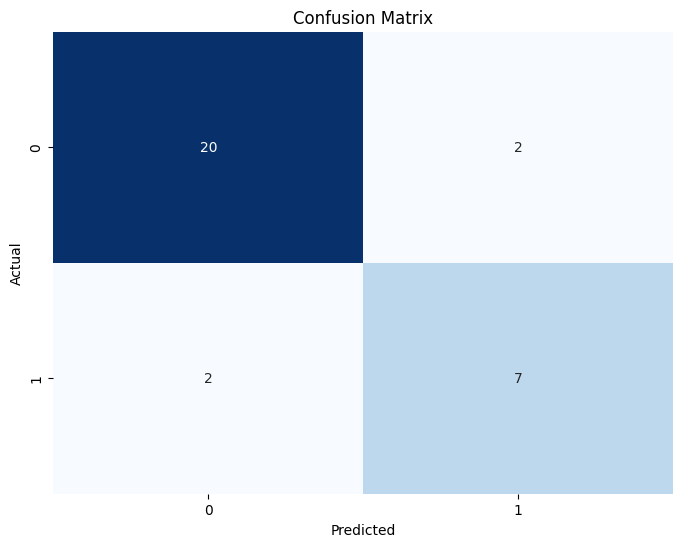

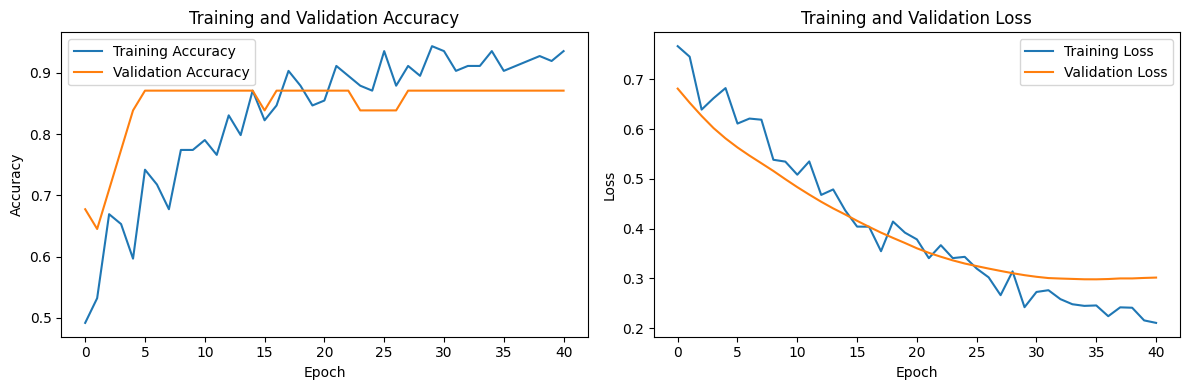

In [18]:
#Feedforward Neural Networks (FNN) - ANN
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# Load the dataset (replace with your dataset path)
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables if needed
# Assuming 'Gender' and 'CLASS' are categorical and need encoding
data['Gender'] = data['Gender'].map({'M': 0, 'F': 1})
data['CLASS'] = data['CLASS'].map({'N': 0, 'P': 1})

# Drop rows with NaN values
data.dropna(inplace=True)

# Separate features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)  # Adjust columns as per your dataset
y = data['CLASS']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
                    verbose=1)

# Evaluate model on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')

# Print classification report and confusion matrix
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


Class Distribution Before Filtering:
 CLASS
3    840
0    102
2     53
4      4
1      1
Name: count, dtype: int64

Class Distribution After Filtering:
 CLASS
3    840
0    102
2     53
Name: count, dtype: int64

Random Forest Classifier Performance:
Accuracy: 0.9801587301587301
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       174
           2       0.98      1.00      0.99       164
           3       0.99      0.97      0.98       166

    accuracy                           0.98       504
   macro avg       0.98      0.98      0.98       504
weighted avg       0.98      0.98      0.98       504



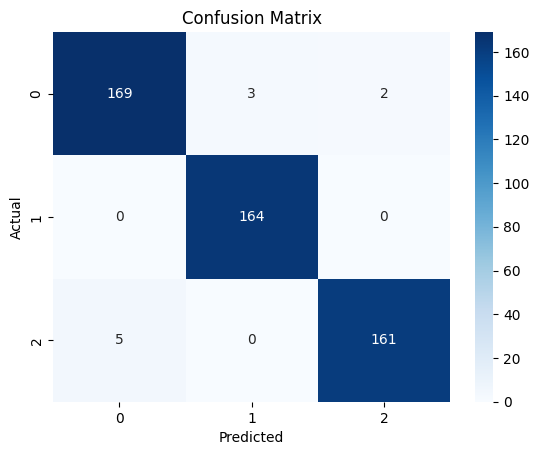

2/2 [==============================] - 0s 6ms/step
Epoch 1/100 - Discriminator Loss: 0.4504396319389343, Generator Loss: 0.5456867218017578
2/2 [==============================] - 0s 6ms/step
Epoch 2/100 - Discriminator Loss: 0.5397182703018188, Generator Loss: 0.7042567729949951
2/2 [==============================] - 0s 7ms/step
Epoch 3/100 - Discriminator Loss: 0.46357131004333496, Generator Loss: 0.9757429361343384
2/2 [==============================] - 0s 7ms/step
Epoch 4/100 - Discriminator Loss: 0.38922619819641113, Generator Loss: 1.0991501808166504
2/2 [==============================] - 0s 8ms/step
Epoch 5/100 - Discriminator Loss: 0.4439702332019806, Generator Loss: 1.0882213115692139
2/2 [==============================] - 0s 5ms/step
Epoch 6/100 - Discriminator Loss: 0.3890216648578644, Generator Loss: 1.476917028427124
2/2 [==============================] - 0s 8ms/step
Epoch 7/100 - Discriminator Loss: 0.45298224687576294, Generator Loss: 1.5218770503997803
2/2 [=============

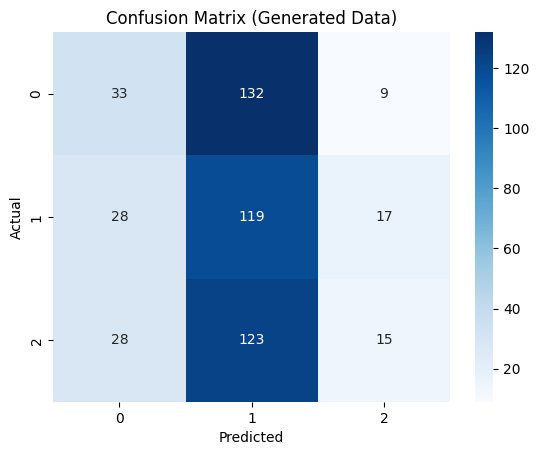

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Check the class distribution
class_counts = y.value_counts()
print("Class Distribution Before Filtering:\n", class_counts)

# Remove classes with fewer than 5 samples
min_samples_threshold = 5
data = data[y.map(y.value_counts()) >= min_samples_threshold]
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Check the class distribution after filtering
class_counts = y.value_counts()
print("\nClass Distribution After Filtering:\n", class_counts)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Normalize/Standardize continuous features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=8)  # Assuming we want to reduce to 8 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Random Forest Classifier (as an example)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_pca, y_train)
y_pred = rf.predict(X_test_pca)

# Evaluate performance
print("\nRandom Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# GAN Model (Generator and Discriminator)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization

# Generator model
def build_generator(latent_dim, output_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())
    model.add(Dense(output_dim, activation='tanh'))
    return model

# Discriminator model
def build_discriminator(input_dim):
    model = Sequential()
    model.add(Dense(256, input_dim=input_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Define dimensions
latent_dim = 100  # Latent vector dimension
output_dim = X_train_pca.shape[1]  # Output dimension

# Build and compile the discriminator
discriminator = build_discriminator(output_dim)
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Build the generator
generator = build_generator(latent_dim, output_dim)

# Build the GAN (combined model)
discriminator.trainable = False  # Freeze the discriminator during GAN training

gan_input = Input(shape=(latent_dim,))
fake_data = generator(gan_input)
gan_output = discriminator(fake_data)

gan = Model(gan_input, gan_output)
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Training loop
epochs = 100
batch_size = 64

for epoch in range(epochs):
    for _ in range(X_train_pca.shape[0] // batch_size):
        # Train discriminator (real samples)
        idx = np.random.randint(0, X_train_pca.shape[0], batch_size)
        real_samples = X_train_pca[idx]
        real_labels = np.ones((batch_size, 1))

        d_loss_real = discriminator.train_on_batch(real_samples, real_labels)

        # Train discriminator (generated samples)
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        generated_data = generator.predict(noise)
        fake_labels = np.zeros((batch_size, 1))

        d_loss_fake = discriminator.train_on_batch(generated_data, fake_labels)

        # Train generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_labels = np.ones((batch_size, 1))

        g_loss = gan.train_on_batch(noise, valid_labels)

    # Print progress
    print(f"Epoch {epoch + 1}/{epochs} - Discriminator Loss: {d_loss_real[0]}, Generator Loss: {g_loss}")

# Generate synthetic data
noise = np.random.normal(0, 1, (X_test_pca.shape[0], latent_dim))
generated_data = generator.predict(noise)

# Evaluate generated data with the Random Forest model
y_pred_gen = rf.predict(generated_data)
print("\nRandom Forest Classifier Performance on Generated Data:")
print("Accuracy:", accuracy_score(y_test, y_pred_gen))
print("Classification Report:\n", classification_report(y_test, y_pred_gen))
conf_matrix_gen = confusion_matrix(y_test, y_pred_gen)
sns.heatmap(conf_matrix_gen, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Generated Data)')
plt.show()



In [53]:
!pip install pandas matplotlib seaborn


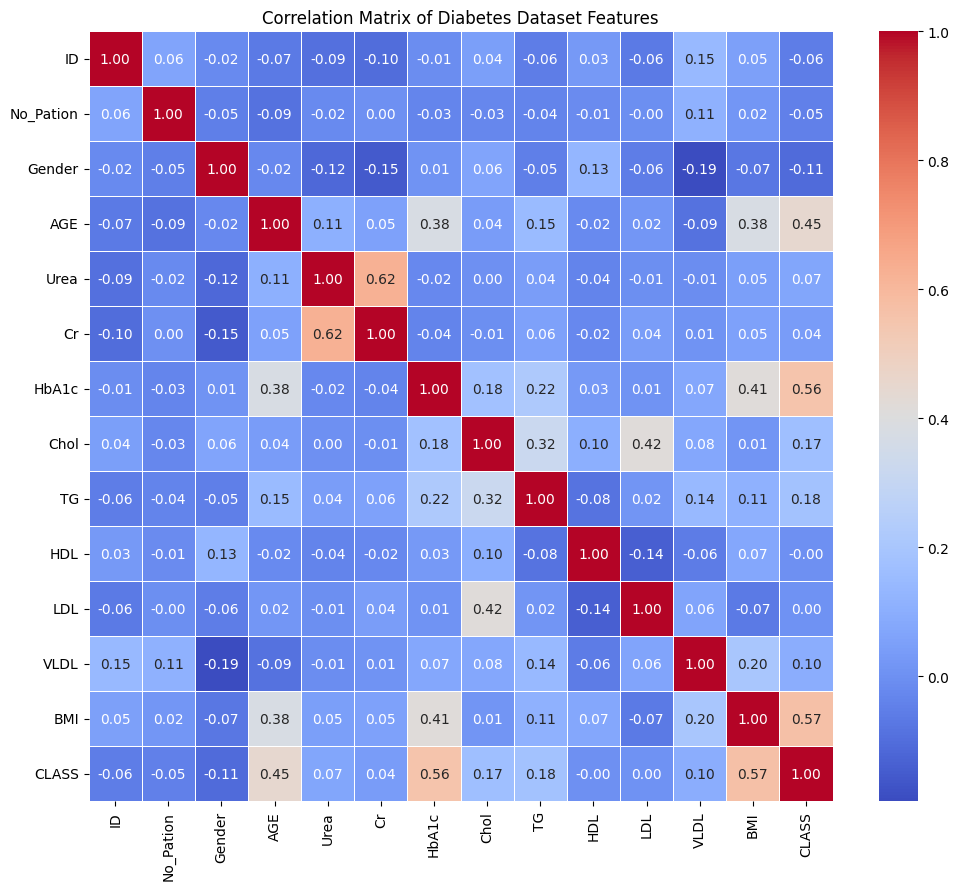

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
df = pd.read_csv(file_path)

# Convert 'Gender' and 'CLASS' columns to numerical values
df['Gender'] = df['Gender'].map({'M': 0, 'F': 1})
df['CLASS'] = df['CLASS'].map({'N': 0, 'P': 1, 'Y': 2}) # Map 'CLASS' values to numbers

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Diabetes Dataset Features')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model Performance Metrics:
                  Model  Accuracy  Precision    Recall  F1 Score       MSE  \
0            ElasticNet  0.369048   0.875029  0.369048  0.459393  0.696429   
1            GaussianNB  0.952381   0.952264  0.952381  0.952170       NaN   
2  GaussianNB SMOTE PCA  0.795635   0.797927  0.795635  0.796385       NaN   
3         MultinomialNB  0.813492   0.819780  0.813492  0.815646       NaN   
4          RandomForest  0.992063   0.992242  0.992063  0.992060       NaN   

         R2  
0  0.559199  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


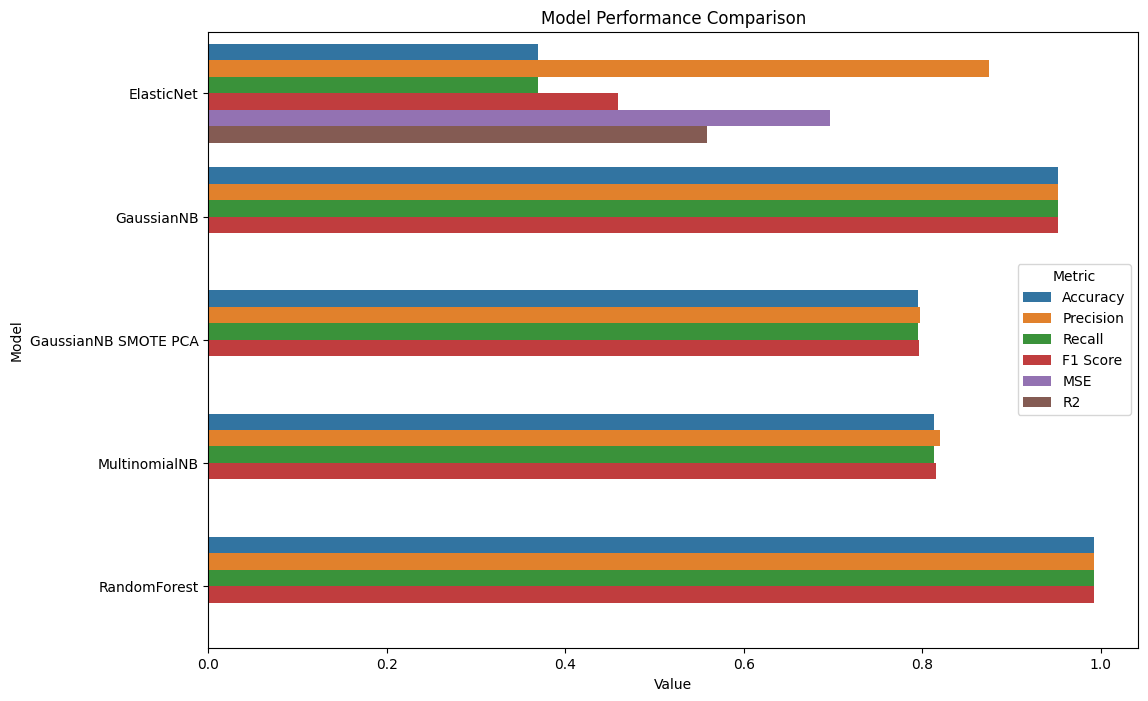

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import ElasticNet
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Remove classes with fewer than 5 samples
min_samples_threshold = 5
data = data[y.map(y.value_counts()) >= min_samples_threshold]
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize a DataFrame to store the performance metrics
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'MSE', 'R2'])

# Function to evaluate and store model metrics
def evaluate_model(name, y_test, y_pred, y_pred_prob=None):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    mse = mean_squared_error(y_test, y_pred) if y_pred_prob is not None else None
    r2 = r2_score(y_test, y_pred) if y_pred_prob is not None else None
    metrics_df.loc[len(metrics_df)] = [name, accuracy, precision, recall, f1, mse, r2]

# ElasticNet Regression
enet = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
enet.fit(X_train, y_train)
y_pred_enet = enet.predict(X_test).round().astype(int)
evaluate_model('ElasticNet', y_test, y_pred_enet, y_pred_enet)

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
evaluate_model('GaussianNB', y_test, y_pred_gnb)

# Gaussian Naive Bayes with SMOTE and PCA
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
gnb_smote_pca = GaussianNB()
gnb_smote_pca.fit(X_train_pca, y_train)
y_pred_gnb_smote_pca = gnb_smote_pca.predict(X_test_pca)
evaluate_model('GaussianNB SMOTE PCA', y_test, y_pred_gnb_smote_pca)

# Multinomial Naive Bayes
X_train_pca -= X_train_pca.min()
X_test_pca -= X_test_pca.min()
mnb = MultinomialNB(alpha=1.0)
mnb.fit(X_train_pca, y_train)
y_pred_mnb = mnb.predict(X_test_pca)
evaluate_model('MultinomialNB', y_test, y_pred_mnb)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
evaluate_model('RandomForest', y_test, y_pred_rf)

# Display the performance metrics table
print("Model Performance Metrics:")
print(metrics_df)

# Plot the performance metrics for comparison
metrics_df_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Value')
plt.figure(figsize=(12, 8))
sns.barplot(x='Value', y='Model', hue='Metric', data=metrics_df_melted)
plt.title('Model Performance Comparison')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

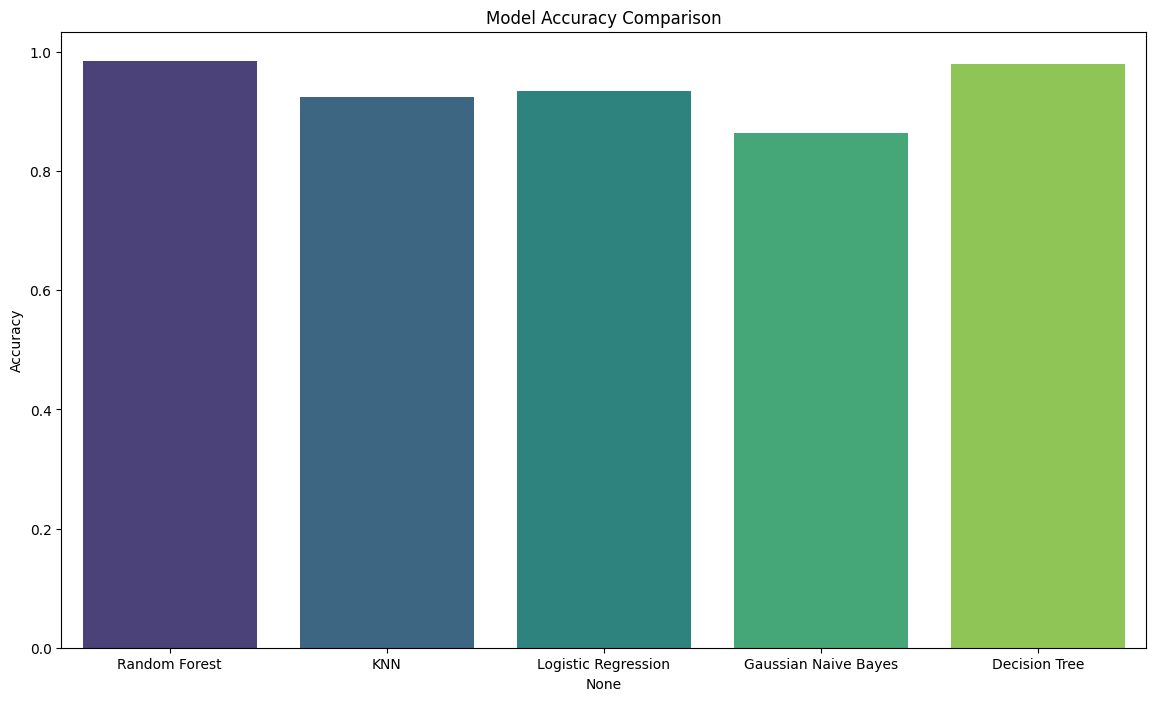

<ipython-input-5-744fd388004a>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['Precision'], palette='viridis')


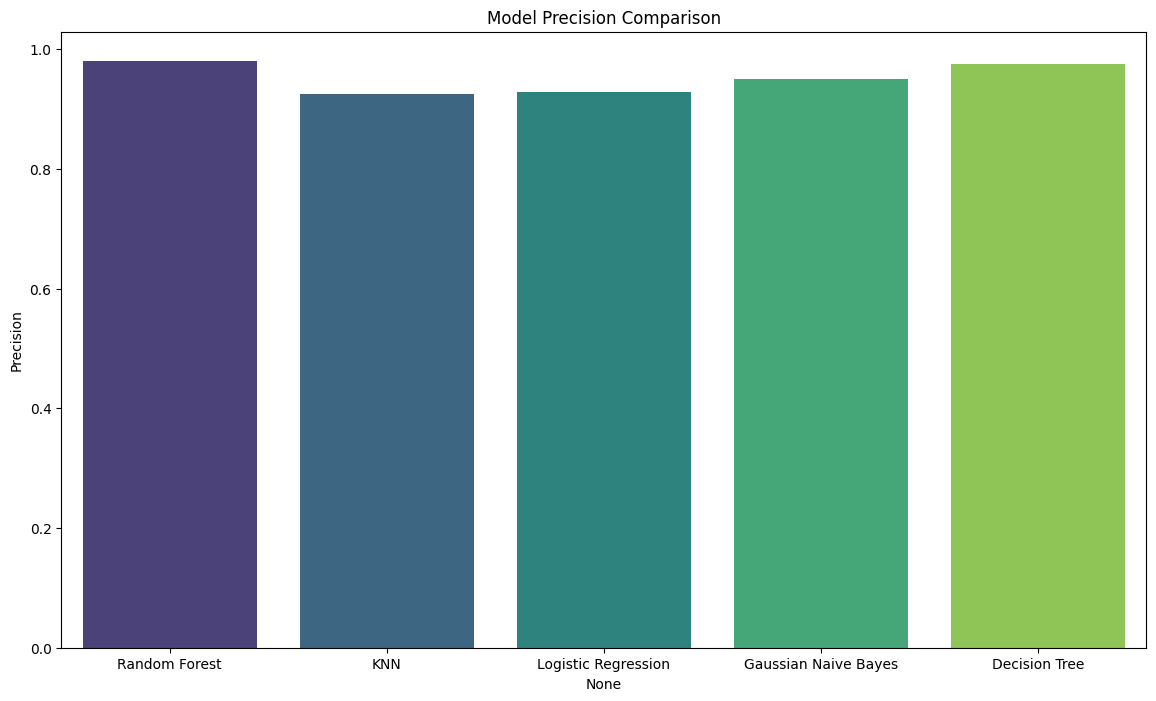

<ipython-input-5-744fd388004a>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['Recall'], palette='viridis')


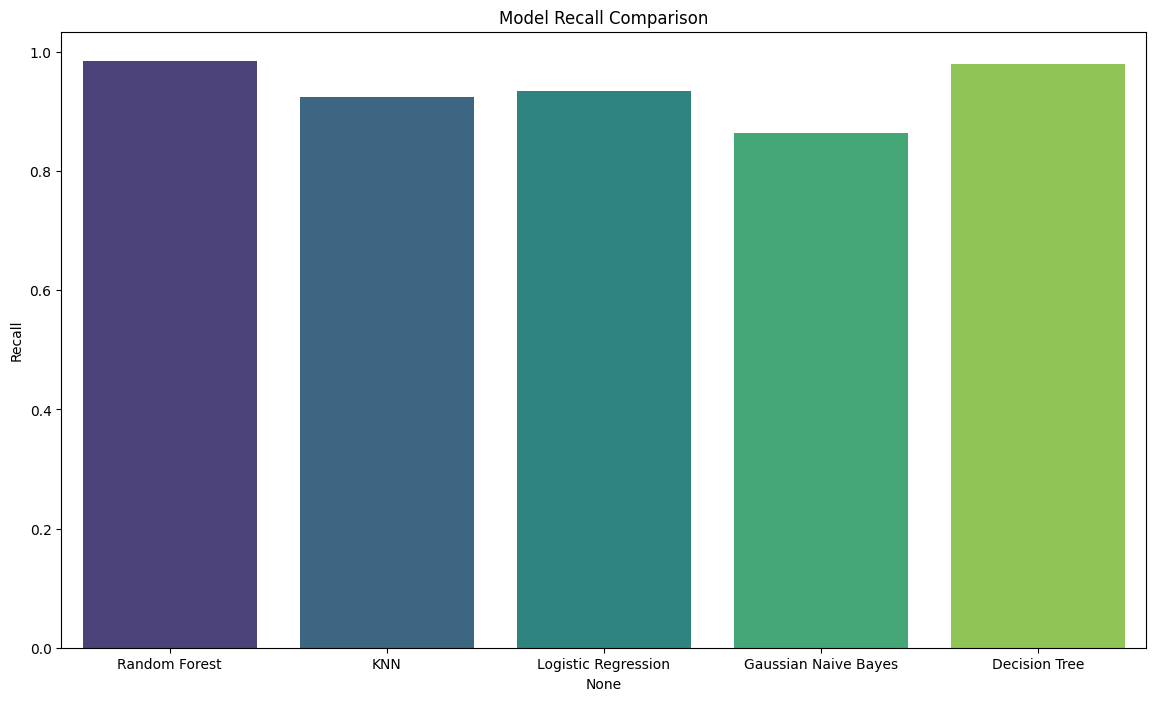

<ipython-input-5-744fd388004a>:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['F1 Score'], palette='viridis')


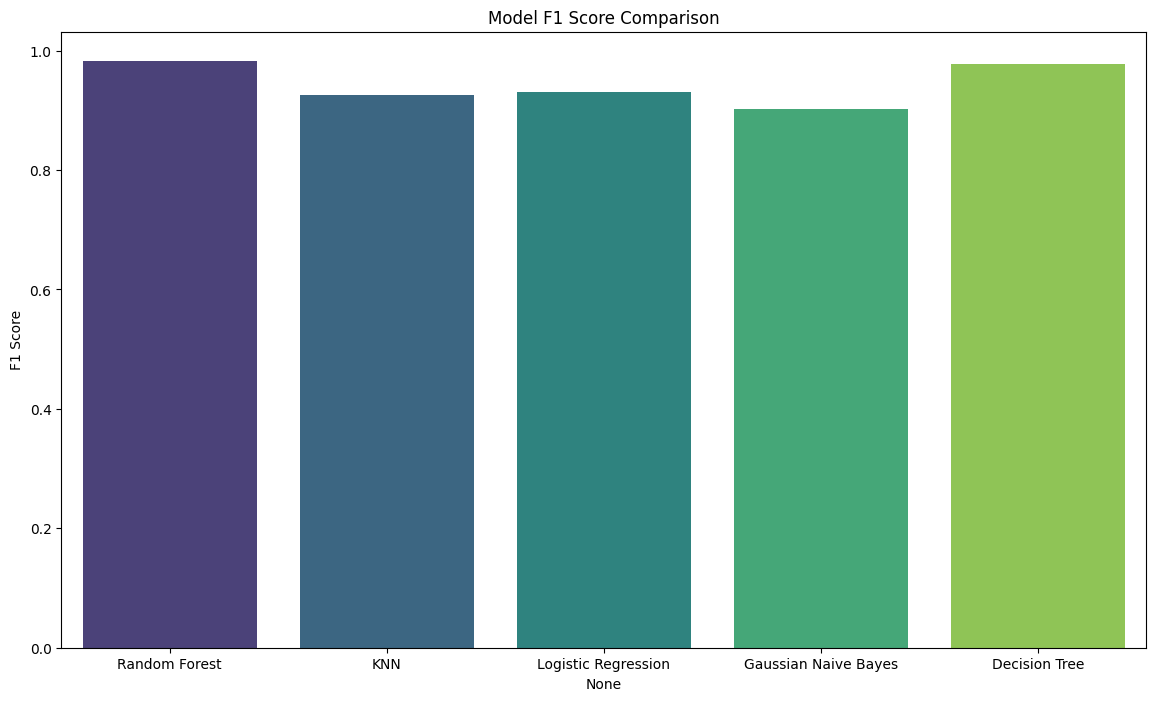

Model Performance Metrics:
                      Accuracy  Precision  Recall  F1 Score
Random Forest            0.985   0.980058   0.985  0.982522
KNN                      0.925   0.925451   0.925  0.924964
Logistic Regression      0.935   0.928750   0.935  0.931000
Gaussian Naive Bayes     0.865   0.950870   0.865  0.901664
Decision Tree            0.980   0.974922   0.980  0.977375


In [5]:
#Comparing Random forest, KNN, Logistic regression, Gaussian Naive Bayesian, Decision Trees  Models
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[model_name] = [accuracy, precision, recall, f1]

# Convert results to a DataFrame
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score']).T

# Plot the results
plt.figure(figsize=(14, 8))
sns.barplot(x=results_df.index, y=results_df['Accuracy'], palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x=results_df.index, y=results_df['Precision'], palette='viridis')
plt.title('Model Precision Comparison')
plt.ylabel('Precision')
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x=results_df.index, y=results_df['Recall'], palette='viridis')
plt.title('Model Recall Comparison')
plt.ylabel('Recall')
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x=results_df.index, y=results_df['F1 Score'], palette='viridis')
plt.title('Model F1 Score Comparison')
plt.ylabel('F1 Score')
plt.show()

# Display the results table
print("Model Performance Metrics:")
print(results_df)


In [7]:
!pip install minisom # Install the missing module

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=8bb5d1e9478d16f456ba8fa47fe63e12b3d345e846b560f8d7a49bd21f3ed223
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 561
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 11
[LightGBM] [Info] Start training from score -2.290163
[LightGBM] [Info] Start training from score -6.684612
[LightGBM] [Info] Start training from score -2.834464
[LightGBM] [Info] Start training from score -0.180324
[LightGBM] [Info] Start training from score -5.585999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-10-fe0fa12942ea>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['Accuracy'], palette='viridis')


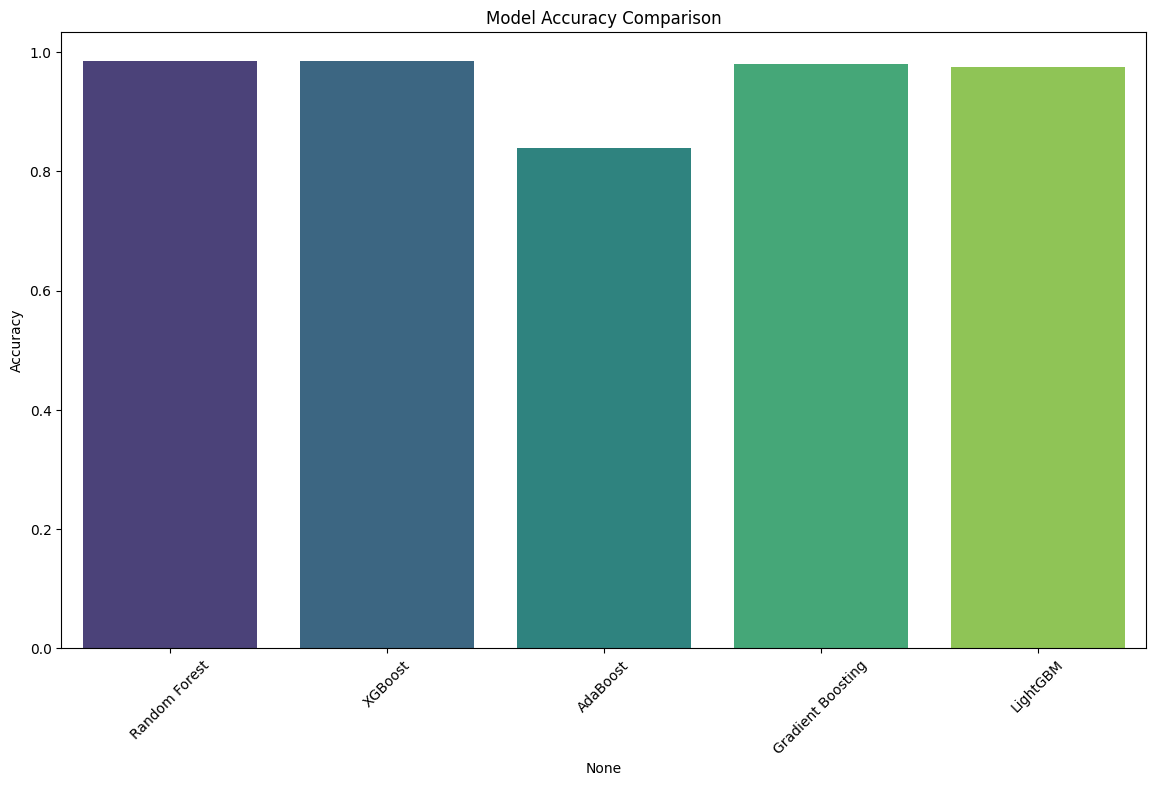

<ipython-input-10-fe0fa12942ea>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['Precision'], palette='viridis')


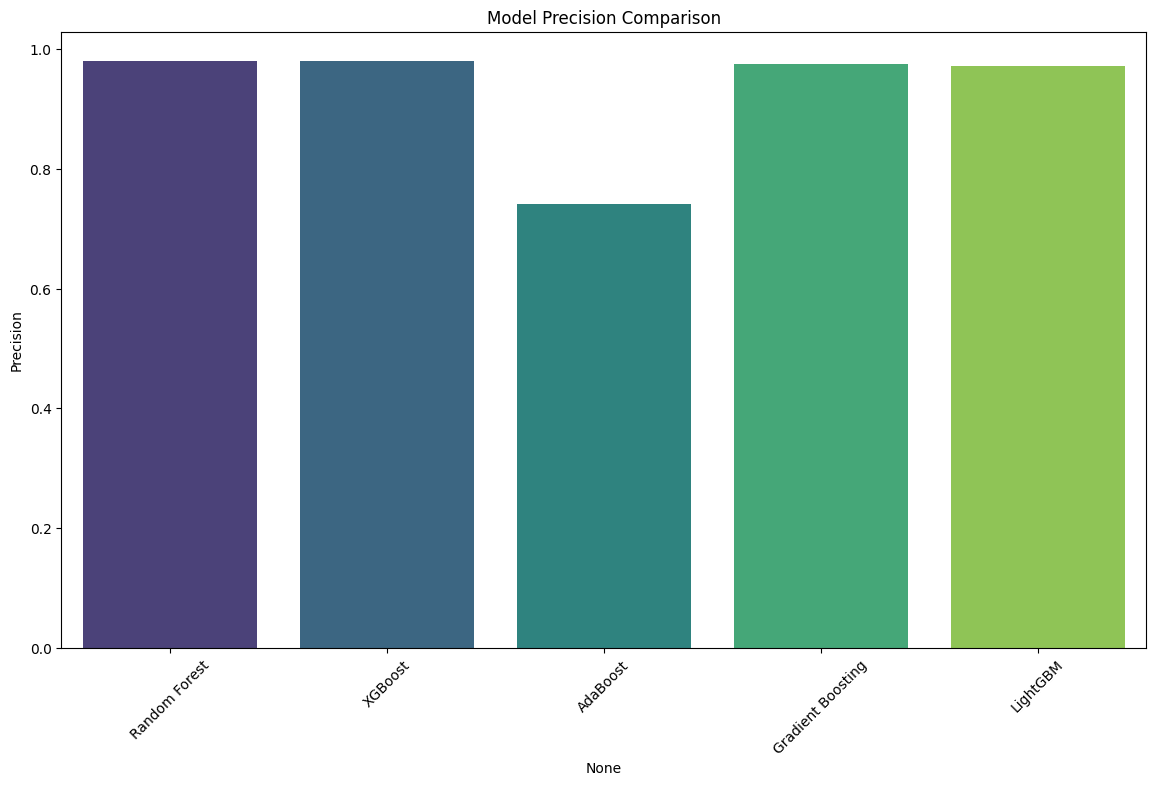

<ipython-input-10-fe0fa12942ea>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['Recall'], palette='viridis')


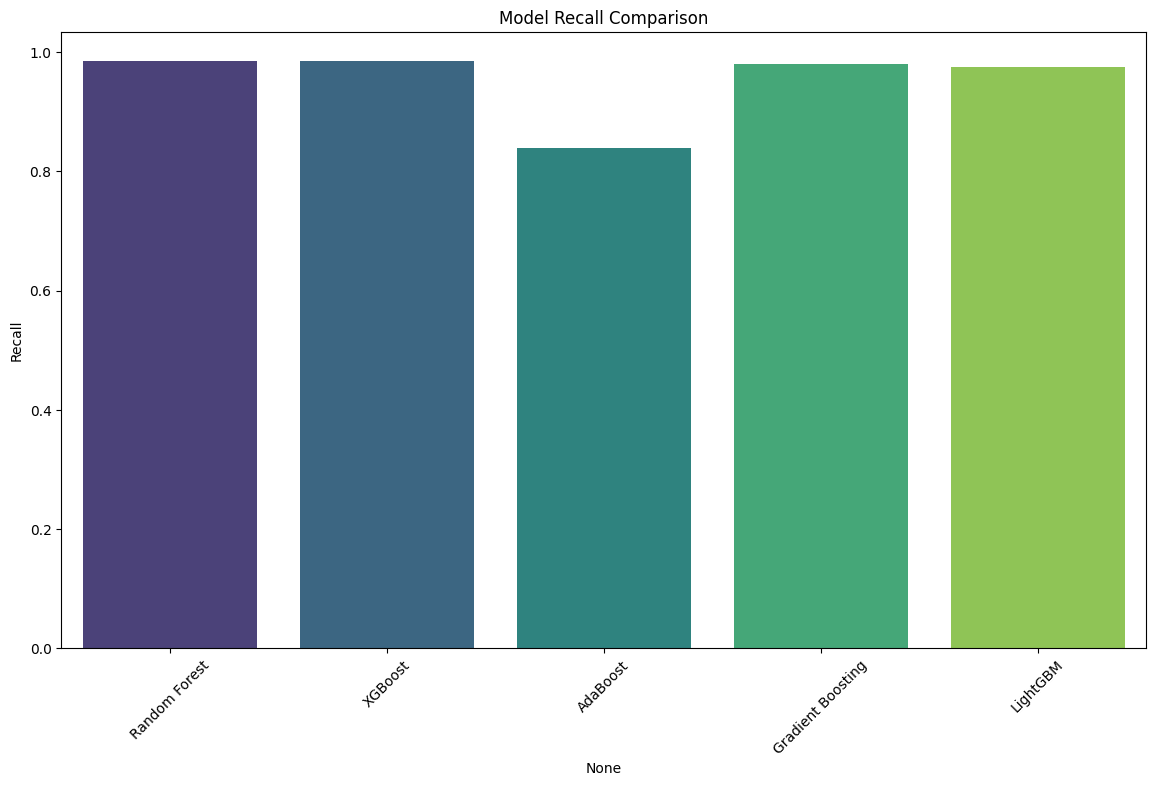

<ipython-input-10-fe0fa12942ea>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['F1 Score'], palette='viridis')


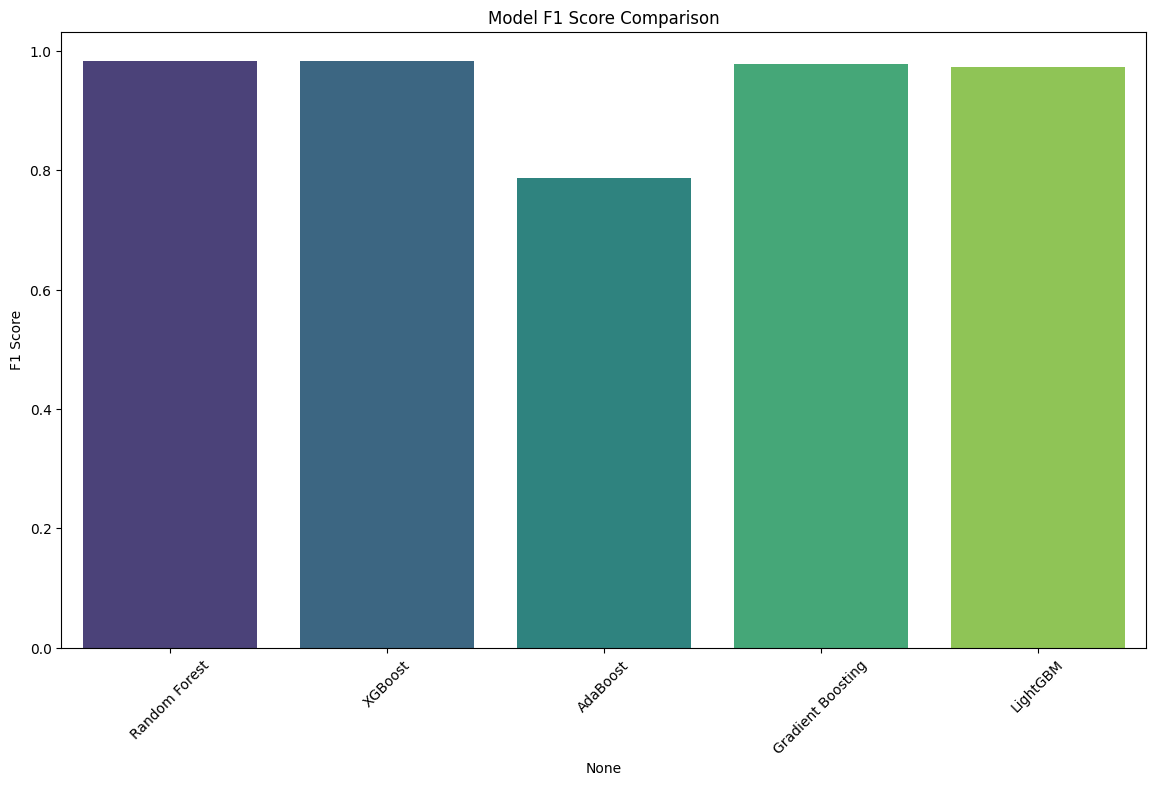

Model Performance Metrics:
                   Accuracy  Precision  Recall  F1 Score
Random Forest         0.985   0.980058   0.985  0.982522
XGBoost               0.985   0.980058   0.985  0.982522
AdaBoost              0.840   0.741143   0.840  0.786237
Gradient Boosting     0.980   0.974922   0.980  0.977375
LightGBM              0.975   0.972031   0.975  0.972736


In [10]:
#Comparing Ensemble methods
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[model_name] = [accuracy, precision, recall, f1]

# Convert results to a DataFrame
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score']).T

# Plot the results
plt.figure(figsize=(14, 8))
sns.barplot(x=results_df.index, y=results_df['Accuracy'], palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x=results_df.index, y=results_df['Precision'], palette='viridis')
plt.title('Model Precision Comparison')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x=results_df.index, y=results_df['Recall'], palette='viridis')
plt.title('Model Recall Comparison')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x=results_df.index, y=results_df['F1 Score'], palette='viridis')
plt.title('Model F1 Score Comparison')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.show()

# Display the results table
print("Model Performance Metrics:")
print(results_df)


In [11]:
pip install pandas matplotlib seaborn scikit-learn


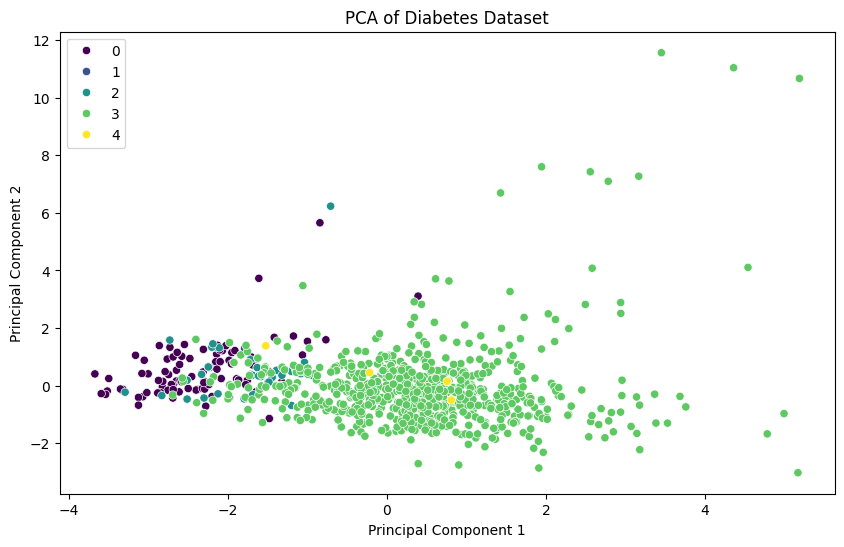

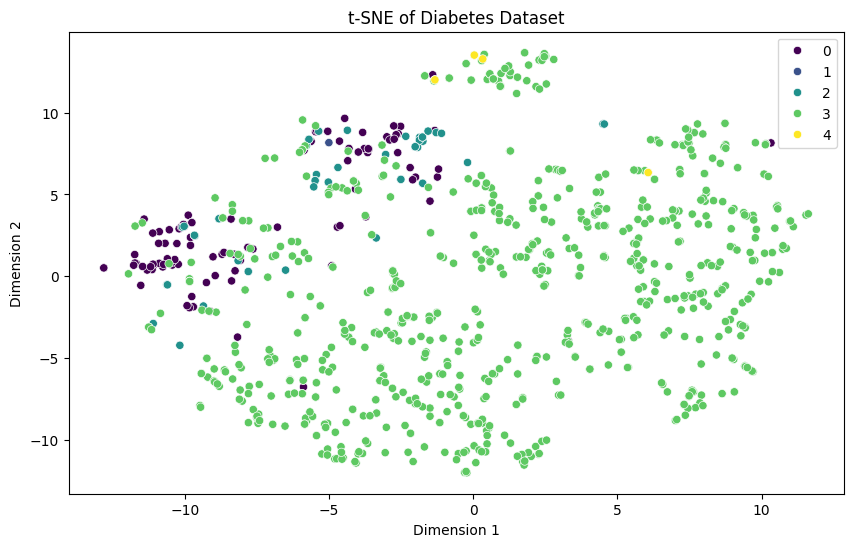

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load the dataset
file_path = '/content/Dataset of Diabetes .csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Define features and target variable
X = data.drop(['ID', 'No_Pation', 'CLASS'], axis=1)
y = data['CLASS']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['CLASS'] = y

# Plot PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='CLASS', palette='viridis', data=pca_df, legend='full')
plt.title('PCA of Diabetes Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
tsne_df = pd.DataFrame(data=X_tsne, columns=['Dim1', 'Dim2'])
tsne_df['CLASS'] = y

# Plot t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dim1', y='Dim2', hue='CLASS', palette='viridis', data=tsne_df, legend='full')
plt.title('t-SNE of Diabetes Dataset')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()


In [13]:
#Data Description


import pandas as pd
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()
feature_names = diabetes.feature_names

# Create a DataFrame for feature descriptions
data_description = [
    {"S. No": 1, "Features": "age", "Description": "Age in years"},
    {"S. No": 2, "Features": "sex", "Description": "Sex (male or female)"},
    {"S. No": 3, "Features": "bmi", "Description": "Body mass index"},
    {"S. No": 4, "Features": "bp", "Description": "Average blood pressure"},
    {"S. No": 5, "Features": "s1", "Description": "T-C (Total cholesterol)"},
    {"S. No": 6, "Features": "s2", "Description": "LDL (Low-density lipoproteins)"},
    {"S. No": 7, "Features": "s3", "Description": "HDL (High-density lipoproteins)"},
    {"S. No": 8, "Features": "s4", "Description": "TCH (Total cholesterol / HDL)"},
    {"S. No": 9, "Features": "s5", "Description": "LTG (Lamotrigine, a marker for diabetes)"},
    {"S. No": 10, "Features": "s6", "Description": "GLU (Blood sugar level)"}
]

df_description = pd.DataFrame(data_description)

# Display the DataFrame
print(df_description)


   S. No Features                               Description
0      1      age                              Age in years
1      2      sex                      Sex (male or female)
2      3      bmi                           Body mass index
3      4       bp                    Average blood pressure
4      5       s1                   T-C (Total cholesterol)
5      6       s2            LDL (Low-density lipoproteins)
6      7       s3           HDL (High-density lipoproteins)
7      8       s4             TCH (Total cholesterol / HDL)
8      9       s5  LTG (Lamotrigine, a marker for diabetes)
9     10       s6                   GLU (Blood sugar level)
